In [1]:
import numpy as np
import os
import joblib
from log_loss_tool import plot_log_loss_with_custom_input
from sklearn.metrics import  auc, precision_recall_curve
from models.evaluate_model import log_loss_final, calcular_variacao_relativa, calcular_prejuizo
from visualizations.plot_results import curva_de_aprendizado, monitorar_custo_gradiente, comparar_gradientes, plot_roc_curve, plot_precision_recall_curve, plot_probability_distribution, exibir_metricas_e_matriz_confusao, matriz_confusao
from sklearn.metrics import auc


# _EVALUATION_

## Regressão Logística - LogisticRegression

In [2]:
# Obter o caminho absoluto da pasta src/models/train_saved
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/models/train_saved')

optimal_threshold_lr = joblib.load(os.path.join(src_path, 'optimal_threshold_lr.pkl'))
model_lr = joblib.load(os.path.join(src_path, 'model_lr.pkl'))
# Carregar o modelo treinado

In [3]:
# Obter o caminho absoluto da pasta src/data/processed_data
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/data/processed_data')

# Carregar as variáveis de volta
X_train = joblib.load(os.path.join(src_path, 'X_train.pkl'))
X_test = joblib.load(os.path.join(src_path, 'X_test.pkl'))
y_train = joblib.load(os.path.join(src_path, 'y_train.pkl'))
y_test = joblib.load(os.path.join(src_path, 'y_test.pkl'))
y_pred_lr = joblib.load(os.path.join(src_path, 'y_pred_lr.pkl'))
y_pred_th_otimo_lr = joblib.load(os.path.join(src_path, 'y_pred_th_otimo_lr.pkl'))
y_prob_th_lr = joblib.load(os.path.join(src_path, 'y_prob_th_lr.pkl'))

print("Dados carregados com sucesso!")

Dados carregados com sucesso!



##### Métricas e Matriz confusão

##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Métricas do modelo:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      3573
           1       0.85      0.66      0.75      3590

    accuracy                           0.78      7163
   macro avg       0.79      0.78      0.77      7163
weighted avg       0.79      0.78      0.77      7163


Matriz de confusão salva como: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Matriz Confusão LogisticRegression - Threshold Padrão.png


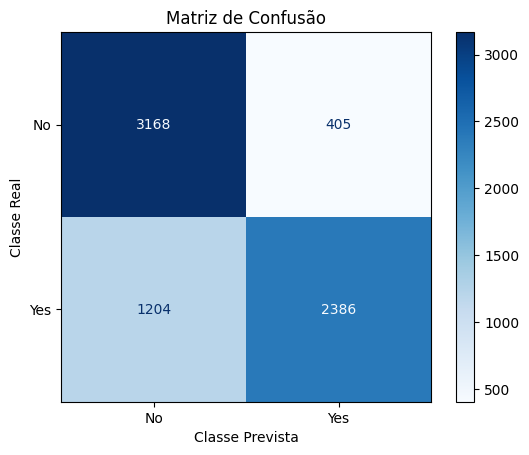

In [4]:
exibir_metricas_e_matriz_confusao(y_test, y_pred_lr, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Padrão')

Visão de negócio

In [5]:
calcular_prejuizo(y_test, y_pred_lr, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 405 | Custo Unitário: R$ 5
Falsos Negativos (FN): 1204 | Custo Unitário: R$ 25
Prejuízo Total: R$ 32125.00


np.int64(32125)


##### Métricas e Matriz confusão - Threshold Ótimo


##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Métricas do modelo:
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      3573
           1       0.62      0.85      0.72      3590

    accuracy                           0.66      7163
   macro avg       0.69      0.66      0.65      7163
weighted avg       0.69      0.66      0.65      7163


Matriz de confusão salva como: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Matriz Confusão LogisticRegression - Threshold Ótimo Recall.png


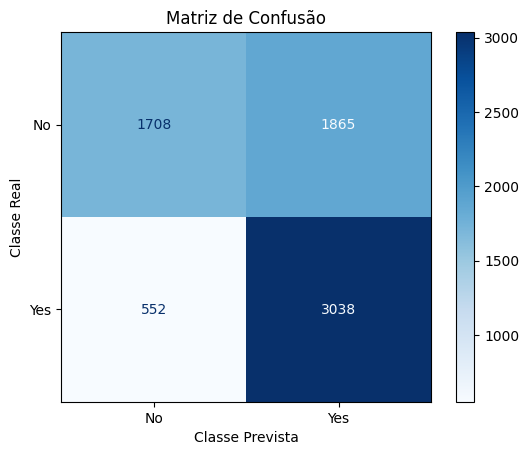

In [6]:
exibir_metricas_e_matriz_confusao(y_test, y_pred_th_otimo_lr, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Ótimo Recall')

In [7]:
calcular_prejuizo(y_test, y_pred_th_otimo_lr, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 1865 | Custo Unitário: R$ 5
Falsos Negativos (FN): 552 | Custo Unitário: R$ 25
Prejuízo Total: R$ 23125.00


np.int64(23125)

### CURVA DE APRENDIZADO DO MODELO

##### Documentação:
[scikit-learn - learning_curve ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)


Gráfico salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva de Aprendizado do modelo LogisticRegression.png


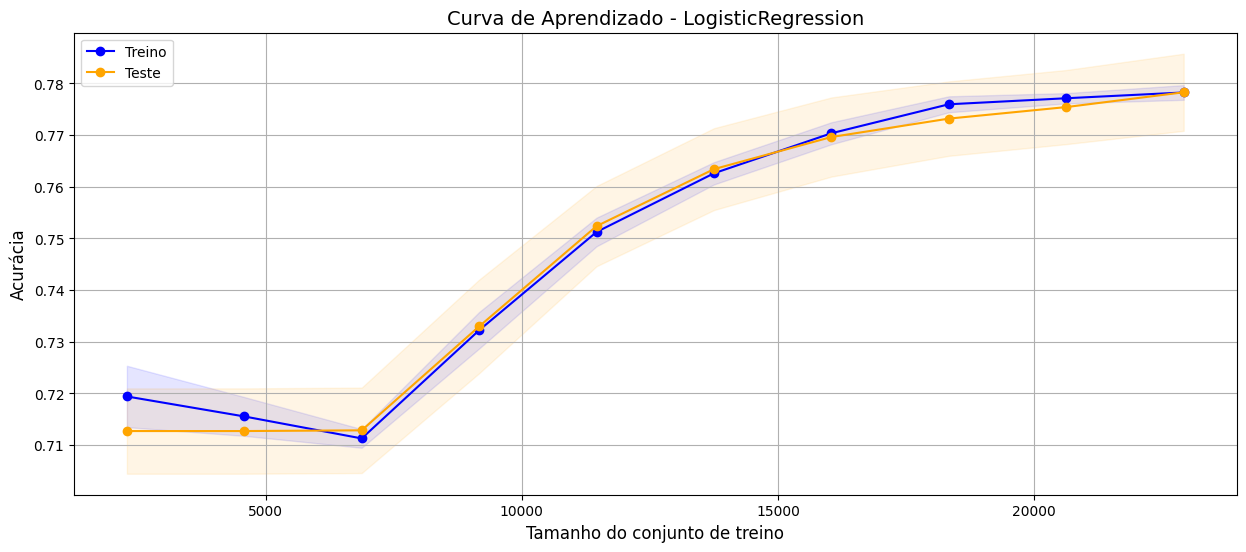

In [8]:
test_std, test_mean, test_scores = curva_de_aprendizado(model_lr, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), nome_arquivo='Curva de Aprendizado do modelo LogisticRegression')

Coeficiente de variação

In [9]:
cv = (test_std / test_mean) * 100
print("Coeficiente de Variação (%):")
print(cv)

if all(cv < 10):
    print("O modelo está estável com CV abaixo de 10%.")
else:
    print("O modelo apresenta variação alta.")

Coeficiente de Variação (%):
[1.15840522 1.15840522 1.15927904 1.23570159 1.03149883 1.0376291
 0.99500562 0.93124691 0.92513116 0.95856146]
O modelo está estável com CV abaixo de 10%.


Variação Relativa

In [10]:
calcular_variacao_relativa(test_scores, threshold=optimal_threshold_lr)

Variação relativa (desvio padrão / média) por tamanho de treino:
Tamanho 1: 0.0116
Tamanho 2: 0.0116
Tamanho 3: 0.0116
Tamanho 4: 0.0124
Tamanho 5: 0.0103
Tamanho 6: 0.0104
Tamanho 7: 0.0100
Tamanho 8: 0.0093
Tamanho 9: 0.0093
Tamanho 10: 0.0096

A variação está dentro dos limites aceitáveis (< 30.61224489795918%).


##### Função de custo - Log-loss

In [11]:
log_loss_geral, gradient_norm = log_loss_final(model_lr, X_train, y_train, X_test, y_test, optimal_threshold_lr)

Log Loss - Treino (Geral): 0.4992
Log Loss - Teste (Geral): 0.5013
Log Loss - Geral (Ponderada): 0.4996
Log Loss de Perda (classe 0) com threshold ótimo: 0.4637
Log Loss de Ganho (classe 1) com threshold ótimo: 0.5386
Norma do Gradiente: 6.6331


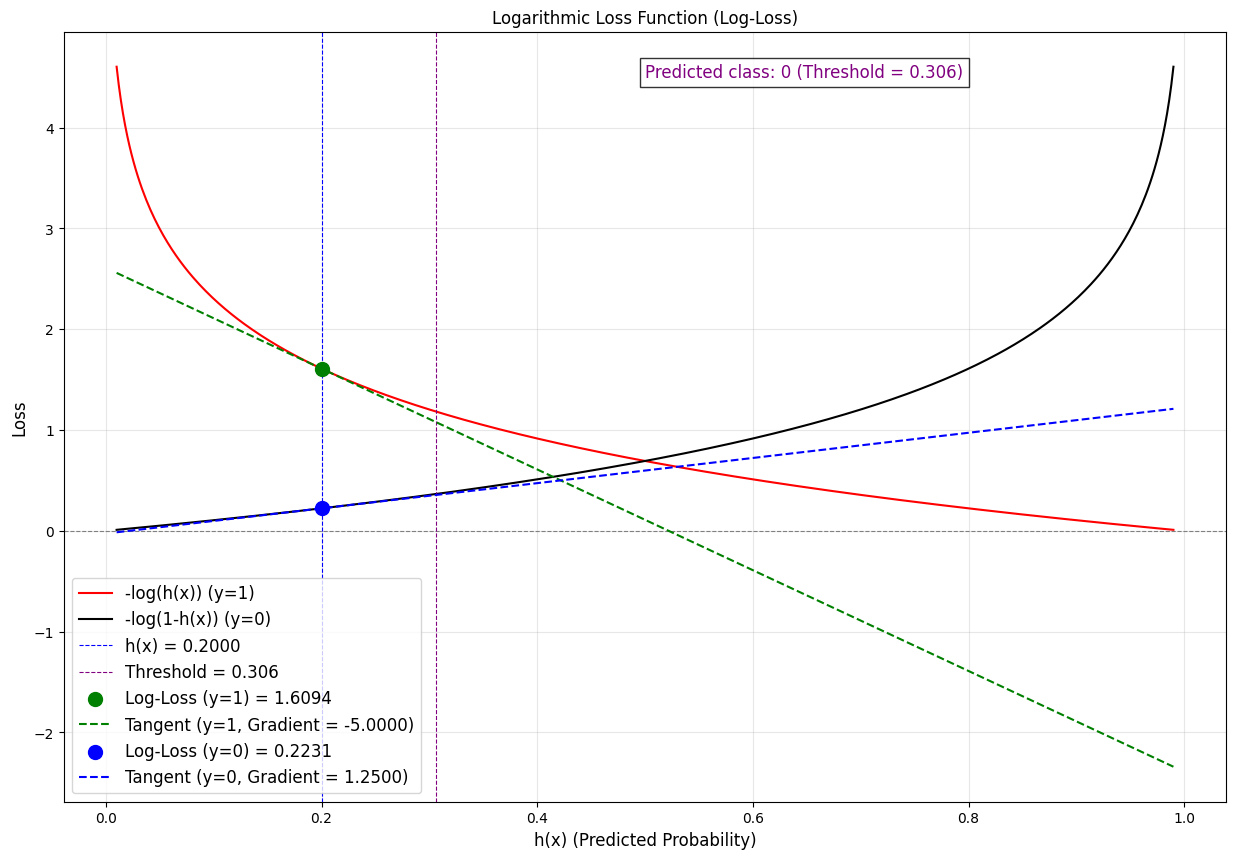

In [12]:
plot_log_loss_with_custom_input(
    probability=0.2,
    log_loss=log_loss_geral,
    gradient=gradient_norm,
    threshold=optimal_threshold_lr
)

Gráfico de Custo salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Evolução da Função de Custo e do Gradiente_custo.png


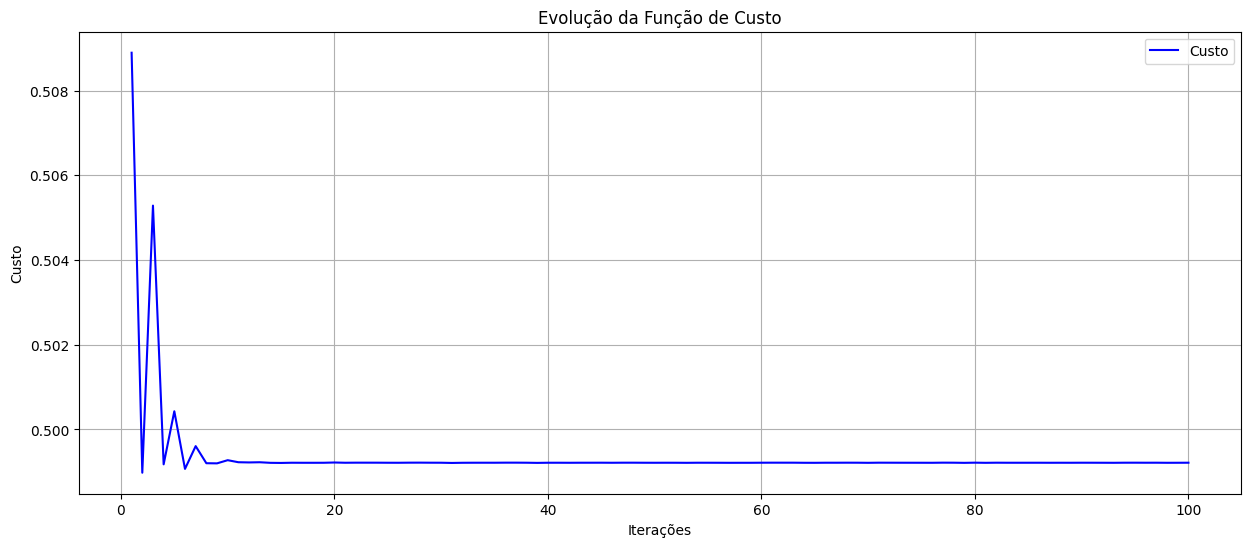

Gráfico de Gradiente salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Evolução da Função de Custo e do Gradiente_gradiente.png


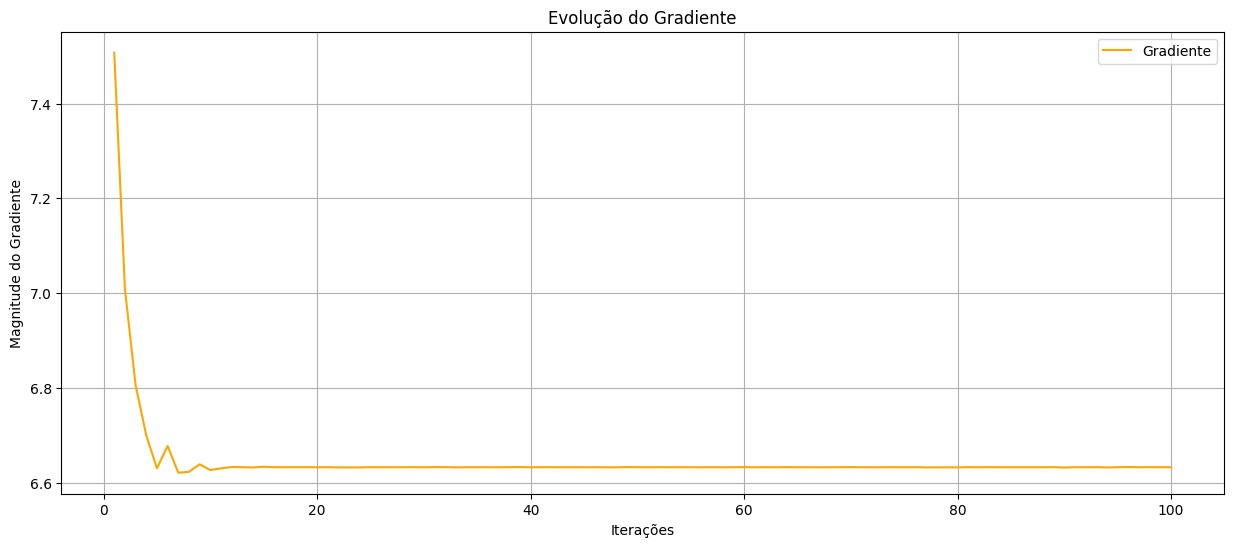

In [13]:
monitorar_custo_gradiente(model_lr, X_train, y_train, max_iter=100, nome_arquivo='Evolução da Função de Custo e do Gradiente')

Gráfico salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Comparação da evolução do Gradiente sem e com Elasticnet.png


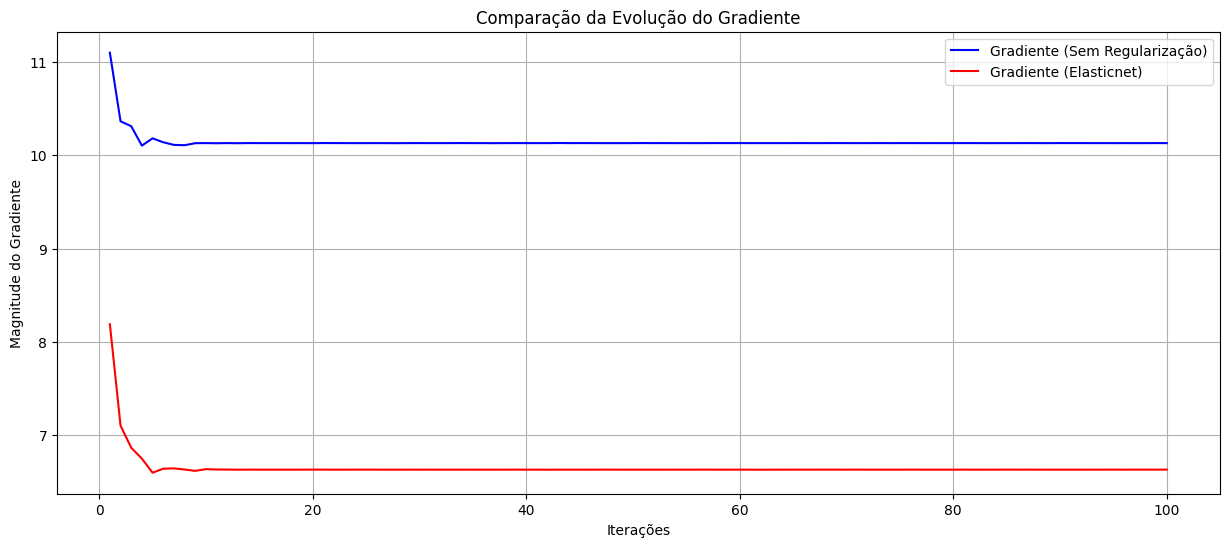

In [14]:
comparar_gradientes(X_train, y_train, model_lr, max_iter=100, nome_arquivo='Comparação da evolução do Gradiente sem e com Elasticnet')


##### Métricas com Threshold Ótimo (F1-Score) e Matriz confusão

##### Documentação:  
[scikit-learn - classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

Visão de negócio

### ANÁLISE GRÁFICA DAS MÉTRICAS EM FUNÇÃO DE THRESHOLD ÓTIMO

### ANÁLISE GRÁFICA DA SENSIBILIDADE E ESTABILIDADE COM PONTO DE CORTE ÓTIMO

### ANÁLISE DE DESEMPENHO E DAS PROBABILIDADES DO MODELO
##### Documentação:
[scikit-learn - precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)  
[scikit-learn - roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)  
[scikit-learn - precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)  
[scikit-learn - auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

Curva ROC

Gráfico ROC salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva ROC modelo LogisticRegression.png


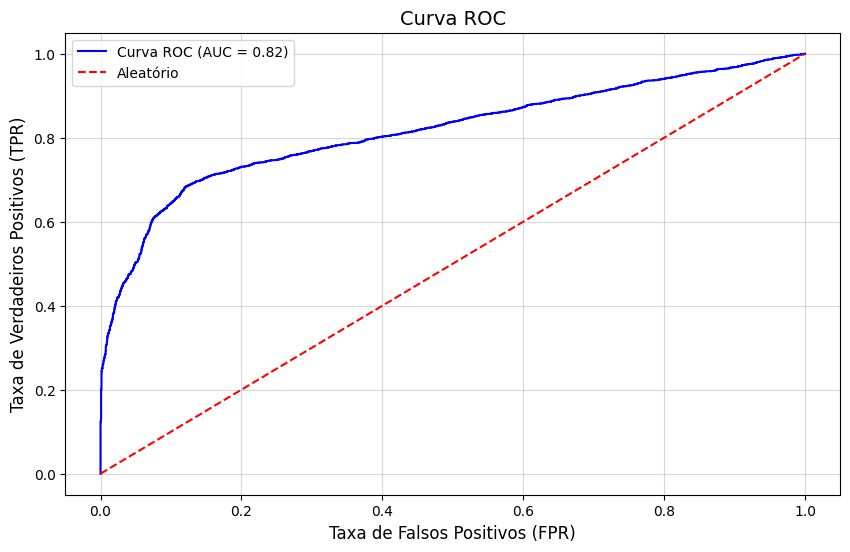

AUC: 0.8156


np.float64(0.8156000551957696)

In [15]:
plot_roc_curve(model_lr, X_test, y_test, nome_arquivo='Curva ROC modelo LogisticRegression')

Curva Precision-Recall - Curva Precisão-Sensibilidade

Gráfico Precision-Recall salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva Precision-Recall modelo LogisticRegression.png


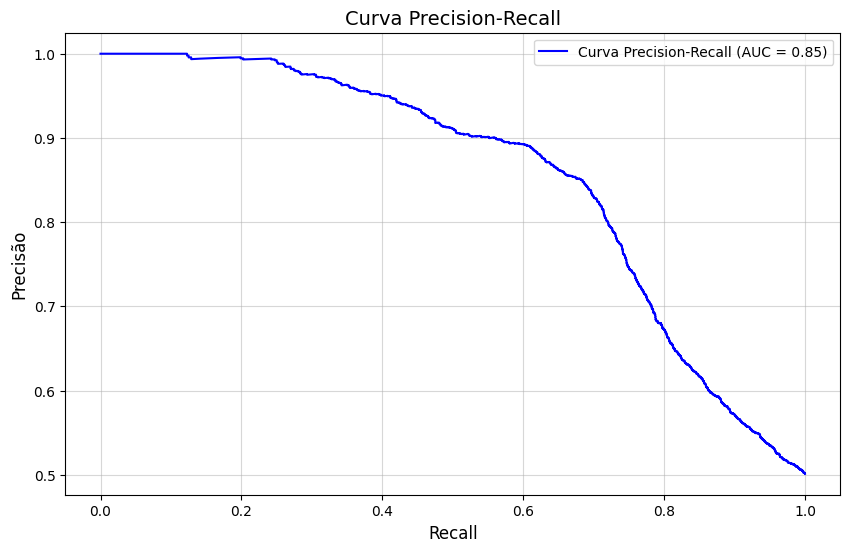

AUC-PR: 0.8544


np.float64(0.854435762151182)

In [16]:
plot_precision_recall_curve(model_lr, X_test, y_test, nome_arquivo='Curva Precision-Recall modelo LogisticRegression')

Distribuição das probabilidades previstas

In [17]:
# Treinar o modelo com os dados de treino
model_lr.fit(X_train, y_train)

# Fazer previsões de probabilidade
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

Gráfico de distribuição de probabilidades salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Distribuição de Probabilidade modelo LogisticRegression.png


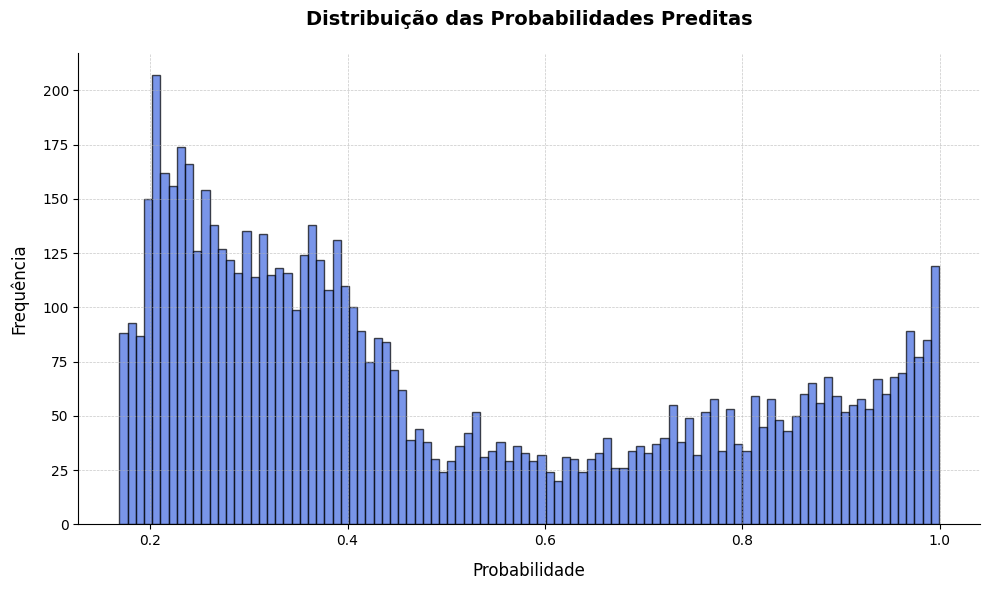

In [18]:
plot_probability_distribution(y_prob_th_lr, bins=100, nome_arquivo='Distribuição de Probabilidade modelo LogisticRegression')

AUC-PR - Area Under the Precision-Recall Curve - Área sob a curva Precisão-Sensibilidade

- AUC-PR foi utilizado para medir a capacidade do modelo d equilibrar precisão e Recall em diferentes pontos de corte, assumindo que inicialmente foi comprovado um desbalanceamento entre as classes

In [19]:
# Substitua y_true e y_prob pelos seus valores reais e preditos
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
# Calcula AUC-PR
auc_pr = auc(recall, precision)
# Exibe os resultados
print(f'AUC-PR: {auc_pr:.2f}')

AUC-PR: 0.85


## Árvores - RandomForest

In [20]:
# Obter o caminho absoluto da pasta src/models/train_saved
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/models/train_saved')

optimal_threshold_rf = joblib.load(os.path.join(src_path, 'optimal_threshold_rf.pkl'))
model_rf = joblib.load(os.path.join(src_path, 'model_rf.pkl'))
# Carregar o modelo treinado

In [21]:
# Obter o caminho absoluto da pasta src/data/processed_data
project_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
src_path = os.path.join(project_path, 'src/data/processed_data')


y_pred_rf = joblib.load(os.path.join(src_path, 'y_pred_rf.pkl'))
y_pred_th_otimo_rf = joblib.load(os.path.join(src_path, 'y_pred_th_otimo_rf.pkl'))
y_prob_th_rf = joblib.load(os.path.join(src_path, 'y_prob_th_rf.pkl'))

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


Estimativa de performance do modelo - OOB Score (Out-of-Bag Score)

In [22]:
print("OOB Score:", model_rf.oob_score_)

OOB Score: 0.7859262103389298


##### Matriz confusão

##### Documentação:
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      3573
           1       0.86      0.68      0.76      3590

    accuracy                           0.79      7163
   macro avg       0.80      0.79      0.78      7163
weighted avg       0.80      0.79      0.78      7163

Matriz de confusão salva em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Matriz Confusão RandomForest - Threshold Padrão_confusion_matrix.png


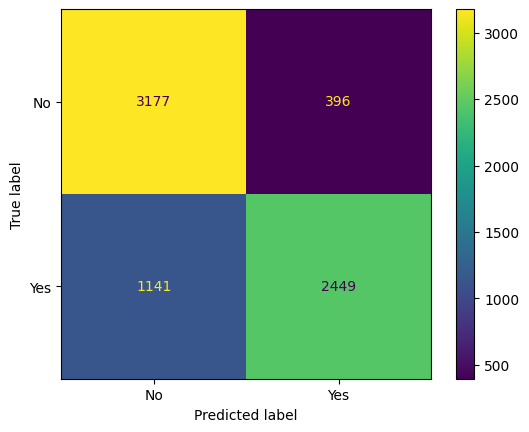

In [23]:
matriz_confusao(y_test, y_pred_rf, nome_arquivo='Matriz Confusão RandomForest - Threshold Padrão')

Visão de negócio

In [24]:
calcular_prejuizo(y_test, y_pred_rf, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 396 | Custo Unitário: R$ 5
Falsos Negativos (FN): 1141 | Custo Unitário: R$ 25
Prejuízo Total: R$ 30505.00


np.int64(30505)

##### Matriz confusão - Threshold Ótimo

##### Documentação:
[scikit-learn - confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[scikit-learn - ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      3573
           1       0.66      0.82      0.73      3590

    accuracy                           0.69      7163
   macro avg       0.71      0.69      0.69      7163
weighted avg       0.71      0.69      0.69      7163

Matriz de confusão salva em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Matriz Confusão LogisticRegression - Threshold Ótimo Recall_confusion_matrix.png


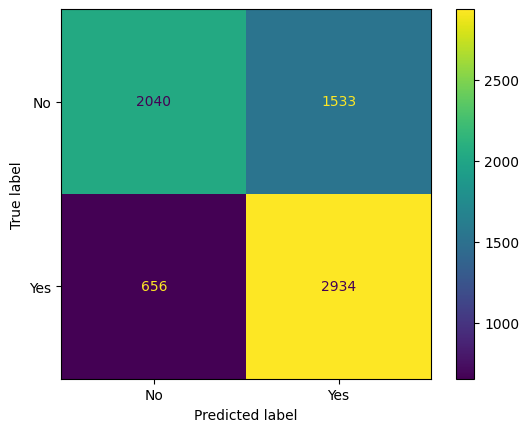

In [25]:
matriz_confusao(y_test, y_pred_th_otimo_rf, nome_arquivo='Matriz Confusão LogisticRegression - Threshold Ótimo Recall')

Visão de negócio - Threshold Ótimo

In [26]:
calcular_prejuizo(y_test, y_pred_th_otimo_rf, custo_fp=5, custo_fn=25)

Falsos Positivos (FP): 1533 | Custo Unitário: R$ 5
Falsos Negativos (FN): 656 | Custo Unitário: R$ 25
Prejuízo Total: R$ 24065.00


np.int64(24065)

### CURVA DE APRENDIZADO DO MODELO DE CLASSIFICAÇÃO POR ÁRVORES

##### Documentação:
[scikit-learn - learning_curve ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

Gráfico salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva de Aprendizado modelo RandomForest.png


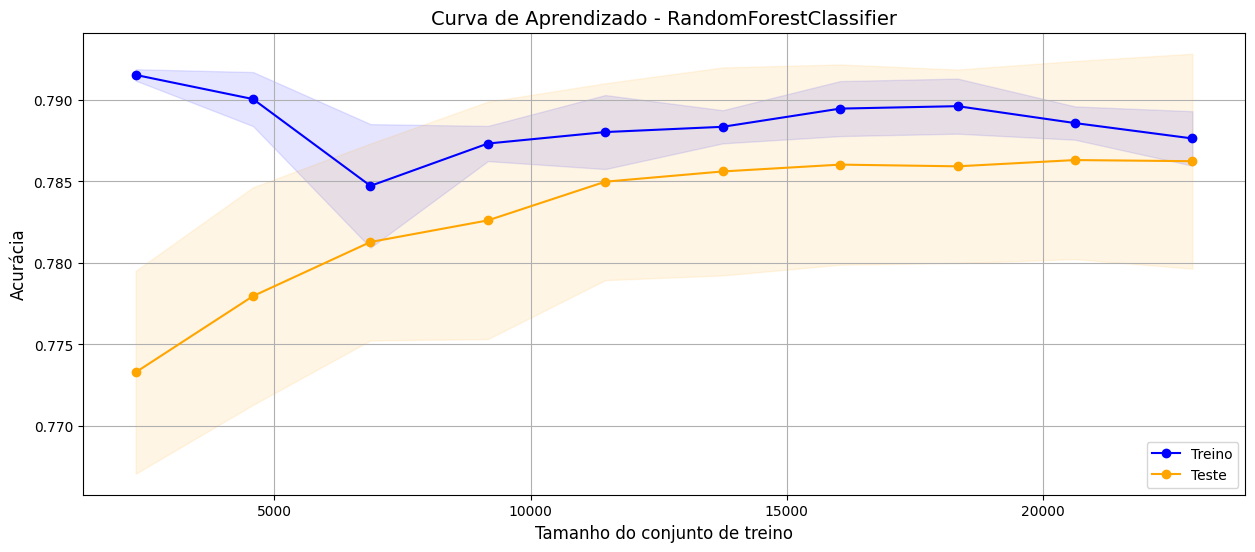

In [27]:
test_std, test_mean, test_scores = curva_de_aprendizado(model_rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), nome_arquivo= 'Curva de Aprendizado modelo RandomForest')

Coeficiente de Variação

In [28]:
cv = (test_std / test_mean) * 100
print("Coeficiente de Variação (%):")
print(cv)

if all(cv < 10):
    print("O modelo está estável com CV abaixo de 10%.")
else:
    print("O modelo apresenta variação alta.")

Coeficiente de Variação (%):
[0.80414847 0.8575999  0.77271966 0.93017806 0.76899117 0.81195272
 0.78141161 0.75513444 0.77250439 0.83840298]
O modelo está estável com CV abaixo de 10%.


Variação relativa

In [29]:
calcular_variacao_relativa(test_scores, threshold=optimal_threshold_rf)

Variação relativa (desvio padrão / média) por tamanho de treino:
Tamanho 1: 0.0080
Tamanho 2: 0.0086
Tamanho 3: 0.0077
Tamanho 4: 0.0093
Tamanho 5: 0.0077
Tamanho 6: 0.0081
Tamanho 7: 0.0078
Tamanho 8: 0.0076
Tamanho 9: 0.0077
Tamanho 10: 0.0084

A variação está dentro dos limites aceitáveis (< 26.530612244897956%).


Função de custo - Log-loss

In [30]:

log_loss_geral, gradient_norm = log_loss_final(model_lr, X_train, y_train, X_test, y_test, optimal_threshold_rf)


Log Loss - Treino (Geral): 0.4992
Log Loss - Teste (Geral): 0.5013
Log Loss - Geral (Ponderada): 0.4996
Log Loss de Perda (classe 0) com threshold ótimo: 0.4637
Log Loss de Ganho (classe 1) com threshold ótimo: 0.5387
Norma do Gradiente: 6.6332


### ANÁLISE DE DESEMPENHO E DAS PROBABILIDADES DO MODELO
##### Documentação:
[scikit-learn - precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)  
[scikit-learn - roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)  
[scikit-learn - precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)  
[scikit-learn - auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

Curva ROC

Gráfico ROC salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva ROC modelo RandomForest.png


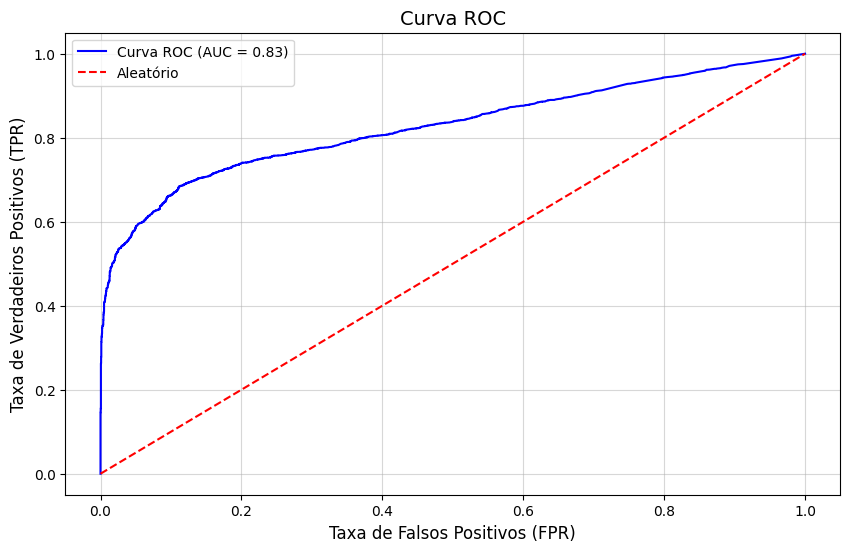

AUC: 0.8258


np.float64(0.825833413242463)

In [31]:
plot_roc_curve(model_rf, X_test, y_test, nome_arquivo= 'Curva ROC modelo RandomForest')

Curva Precision-Recall - Curva Precisão-Sensibilidade

Gráfico Precision-Recall salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Curva Precision-Recall modelo RandomForest.png


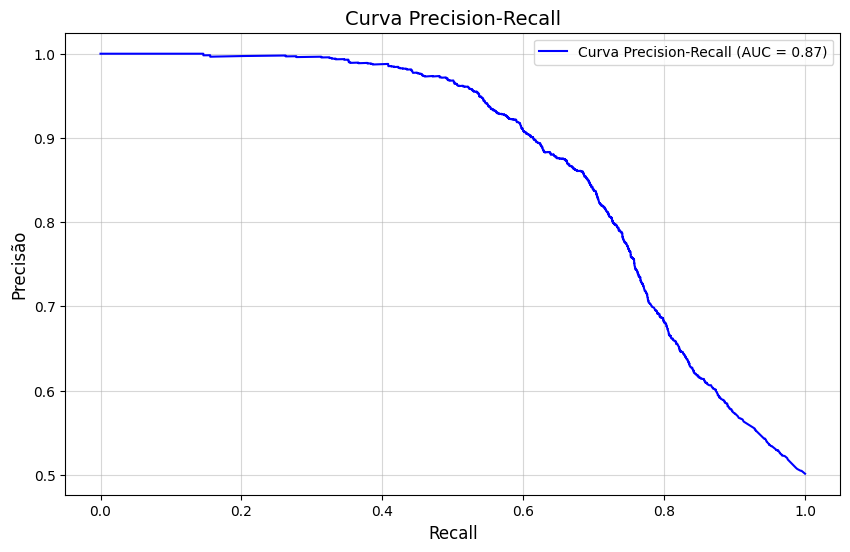

AUC-PR: 0.8701


np.float64(0.8701279060628648)

In [32]:
plot_precision_recall_curve(model_rf, X_test, y_test, nome_arquivo= 'Curva Precision-Recall modelo RandomForest')

Distribuição das probabilidades previstas

In [33]:
# Treinar o modelo com os dados de treino
model_rf.fit(X_train, y_train)

# Fazer previsões de probabilidade
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

Gráfico de distribuição de probabilidades salvo em: /Users/rodrigocampos/Documents/Pandas/Desafio06/Churned/project/reports/figures/Distribuição de Probabilidade modelo RandomForest.png


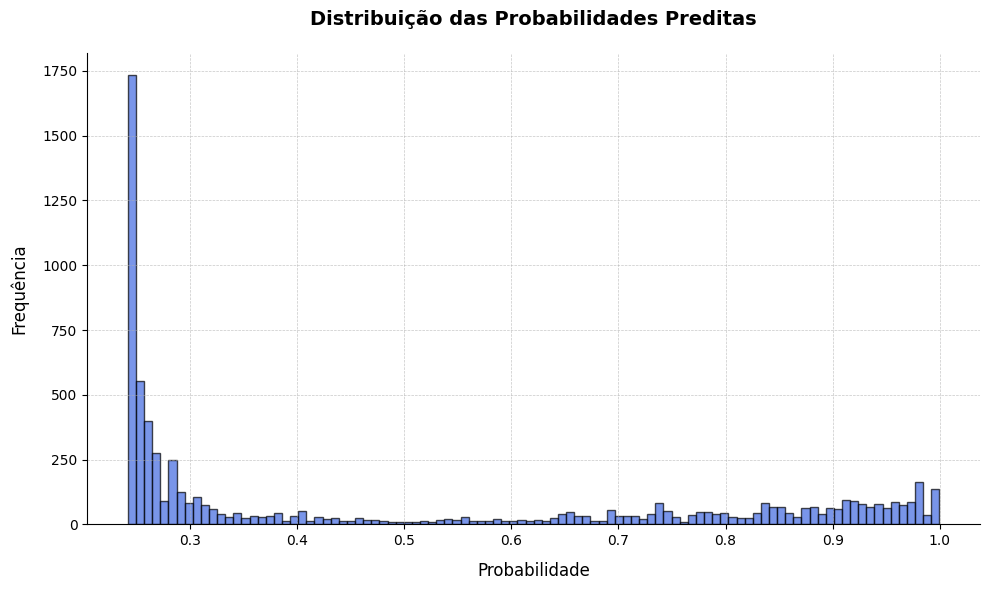

In [34]:
plot_probability_distribution(y_prob_th_rf, bins=100, nome_arquivo='Distribuição de Probabilidade modelo RandomForest')

AUC-PR - Area Under the Precision-Recall Curve - Área sob a curva Precisão-Sensibilidade

- AUC-PR foi utilizado para medir a capacidade do modelo d equilibrar precisão e Recall em diferentes pontos de corte, assumindo que inicialmente foi comprovado um desbalanceamento entre as classes

In [35]:
auc_pr = auc(recall, precision)
print(f'AUC-PR: {auc_pr:.2f}')

AUC-PR: 0.85
